In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [28]:
data = pd.read_csv('MRF.csv') 

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [30]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce') 
data = data.dropna() 
MRF = data.iloc[:,4:5].values 

In [31]:
sc = MinMaxScaler(feature_range=(0,1))
MRF = sc.fit_transform(MRF)
MRF.shape

(249, 1)

In [32]:
X_train = []
y_train = []

for i in range (60,200): 
    X_train.append(MRF[i-60:i,0]) 
    y_train.append(MRF[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [33]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(140, 60, 1)

In [34]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [35]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
5/5 - 14s - loss: 0.0886 - 14s/epoch - 3s/step
Epoch 2/20
5/5 - 2s - loss: 0.0384 - 2s/epoch - 440ms/step
Epoch 3/20
5/5 - 2s - loss: 0.0258 - 2s/epoch - 439ms/step
Epoch 4/20
5/5 - 2s - loss: 0.0223 - 2s/epoch - 438ms/step
Epoch 5/20
5/5 - 2s - loss: 0.0183 - 2s/epoch - 476ms/step
Epoch 6/20
5/5 - 3s - loss: 0.0164 - 3s/epoch - 518ms/step
Epoch 7/20
5/5 - 3s - loss: 0.0134 - 3s/epoch - 578ms/step
Epoch 8/20
5/5 - 2s - loss: 0.0114 - 2s/epoch - 428ms/step
Epoch 9/20
5/5 - 2s - loss: 0.0122 - 2s/epoch - 381ms/step
Epoch 10/20
5/5 - 2s - loss: 0.0120 - 2s/epoch - 302ms/step
Epoch 11/20
5/5 - 1s - loss: 0.0110 - 1s/epoch - 280ms/step
Epoch 12/20
5/5 - 2s - loss: 0.0093 - 2s/epoch - 456ms/step
Epoch 13/20
5/5 - 1s - loss: 0.0099 - 1s/epoch - 229ms/step
Epoch 14/20
5/5 - 1s - loss: 0.0089 - 959ms/epoch - 192ms/step
Epoch 15/20
5/5 - 2s - loss: 0.0095 - 2s/epoch - 441ms/step
Epoch 16/20
5/5 - 2s - loss: 0.0093 - 2s/epoch - 381ms/step
Epoch 17/20
5/5 - 2s - loss: 0.0084 - 2s/epoch 

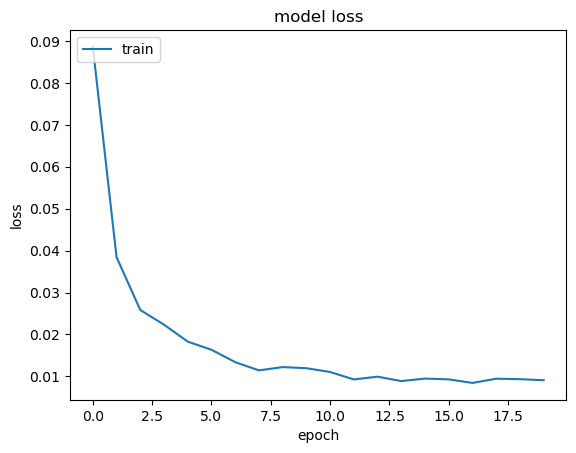

In [36]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [37]:
MRF = pd.read_csv('MRF.csv') #importing the test data
MRF["Close"]=pd.to_numeric(MRF.Close,errors='coerce') #turning the close column to numerical type
MRF = MRF.dropna() #droping the NA values
MRF = MRF.iloc[:,4:5] #selecting the closing prices for testing
y_test = MRF.iloc[60:,0:].values #selecting the labels 
#input array for the model
inputClosing = MRF.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(MRF)
timestep = 60
for i in range(timestep,length): #doing the same preivous preprocessing 
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(189, 60, 1)

In [38]:
y_pred = model.predict(X_test) 

6/6 [==============================] - 3s 70ms/step


In [21]:
predicted_price = sc.inverse_transform(y_pred) 

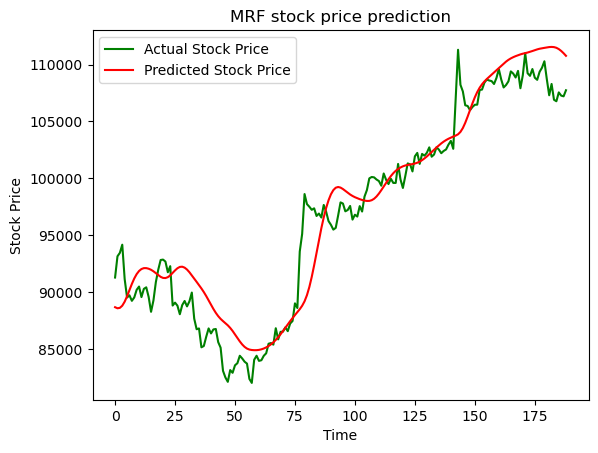

In [26]:
plt.plot(y_test, color = 'green', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('MRF stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()